# Model

## Setup

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)

import sys, os, yaml

DATASET = "Credit Card"
COLAB = 'google.colab' in sys.modules

DEBUG = False
SEED = 666

In [28]:
COLAB = 'google.colab' in sys.modules

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

## Load Dataset

In [29]:
df = pd.read_pickle(f"{ROOT}/data/X_CreditCard.pickle")
df.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


In [30]:
X= np.asarray(df)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

In [33]:
print(X)

[[ 0.36067954 -0.97851102 -0.43862278 ... -0.54119881 -0.64681226
  -0.69462206]
 [ 0.36067954  1.29798329 -1.18015543 ...  0.45299851 -1.09971241
   0.12597818]
 [ 0.36067954  0.53915185  0.30290987 ... -0.54119881  0.25898804
  -0.69462206]
 ...
 [-4.12276757 -0.97851102 -0.43862278 ...  0.45299851 -0.64681226
  -0.69462206]
 [-4.12276757 -0.97851102 -1.18015543 ...  0.45299851 -1.09971241
   0.12597818]
 [-4.12276757 -0.97851102  1.04444252 ... -0.54119881  1.16478834
   0.12597818]]


## Baseline Model

#### Clustering com Kmeans

## ELBOW

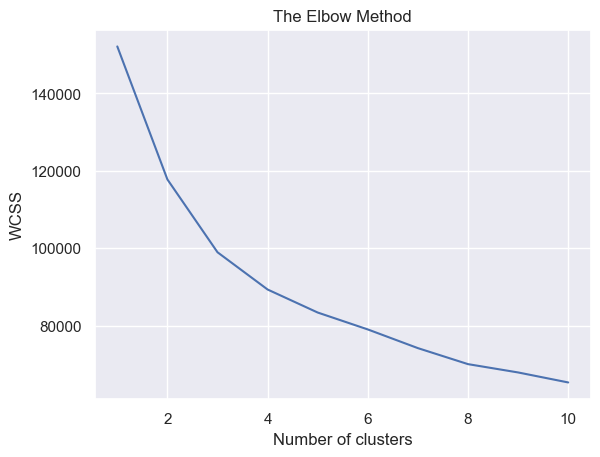

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

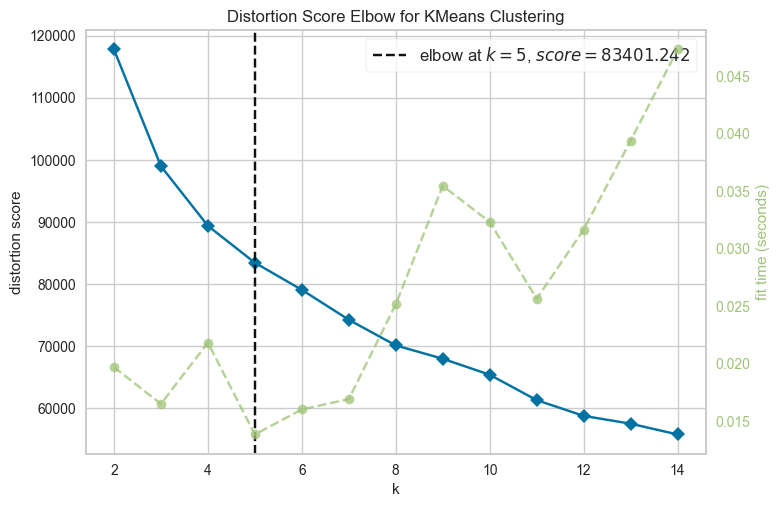

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

### Escolhido 6 Clusters

In [ ]:
kmean= KMeans(n_clusters =6, init = 'k-means++', random_state = 42)
kmean.fit(X)
labels=kmean.labels_

In [ ]:
clusters_labels = pd.DataFrame({'cluster':labels})
clusters_labels.head(3)

,cluster
0,1
1,4
2,0


In [ ]:
clusters=pd.concat([df,clusters_labels], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,1
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,4
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,0
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,1


## Interpretação dos Clusters

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

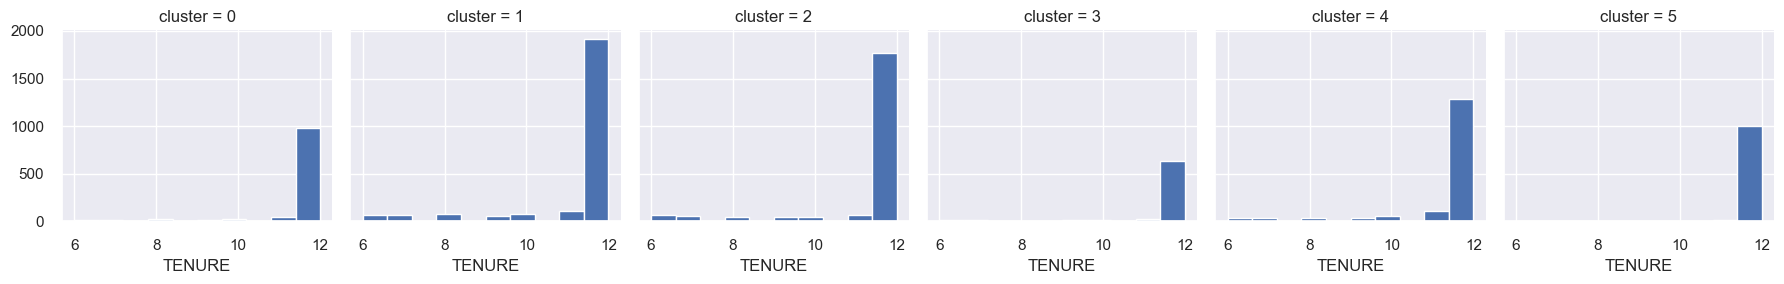

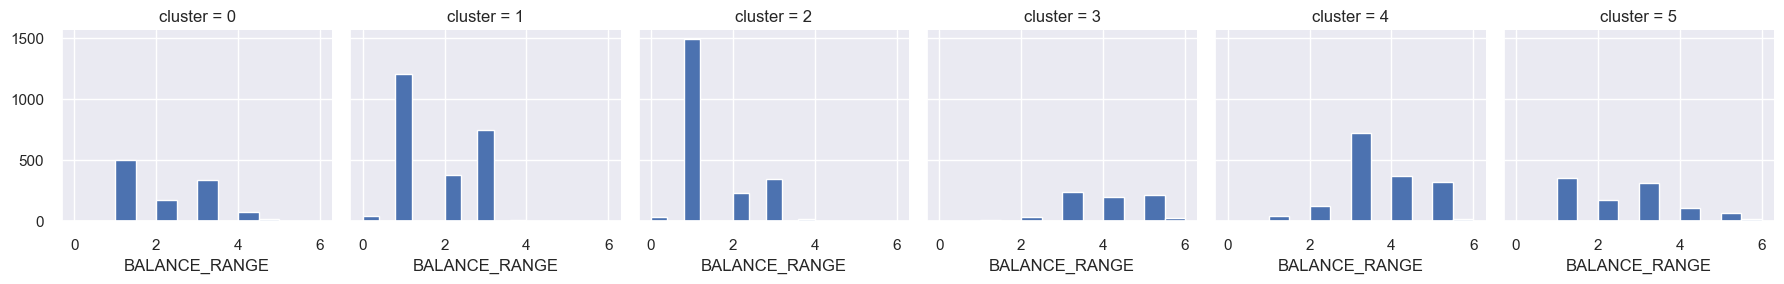

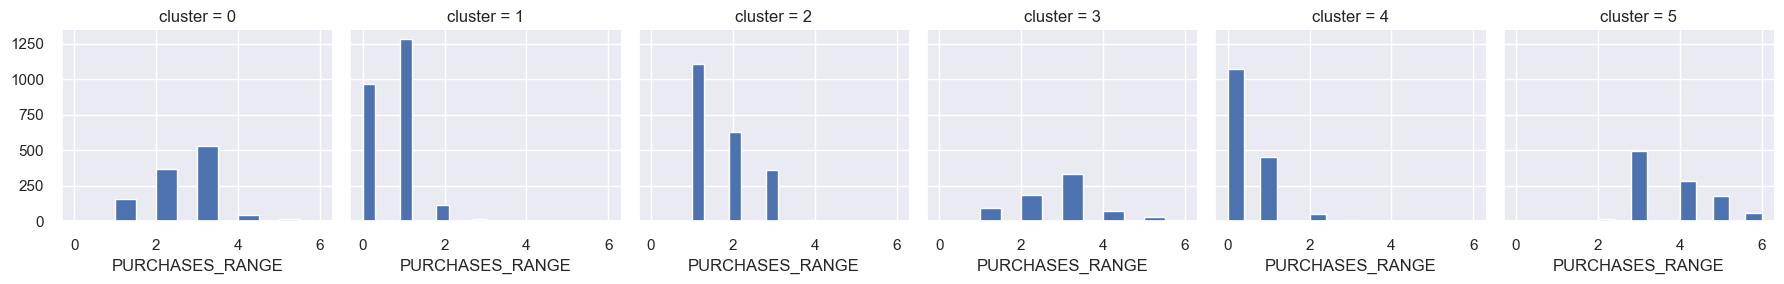

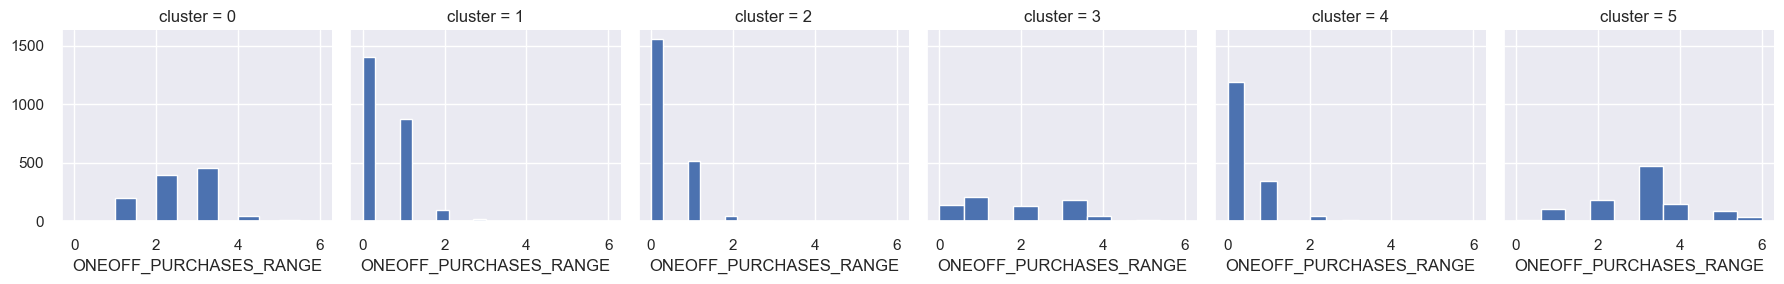

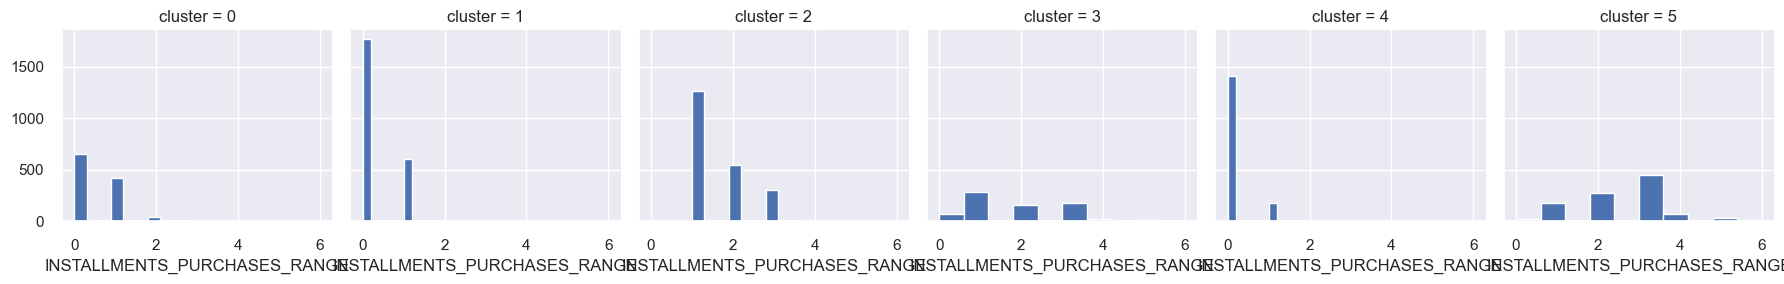

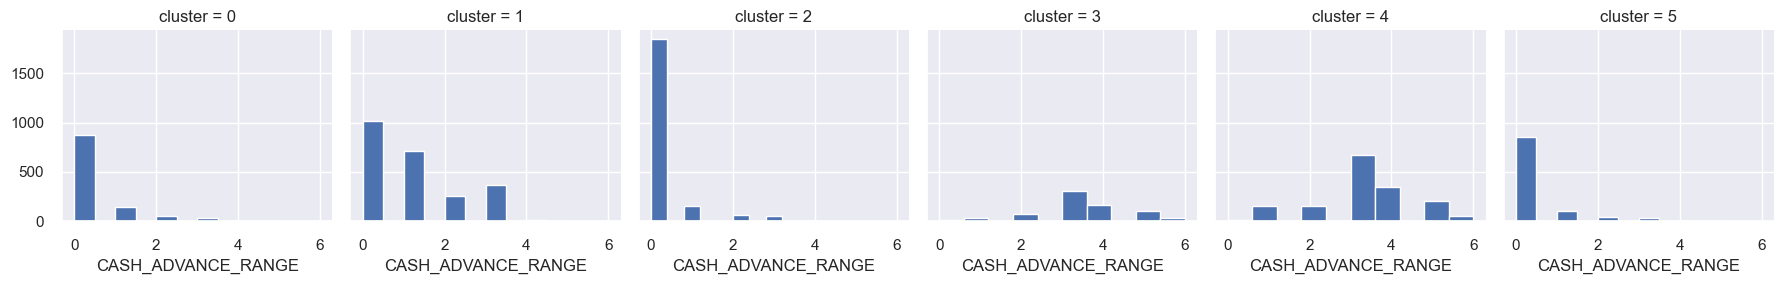

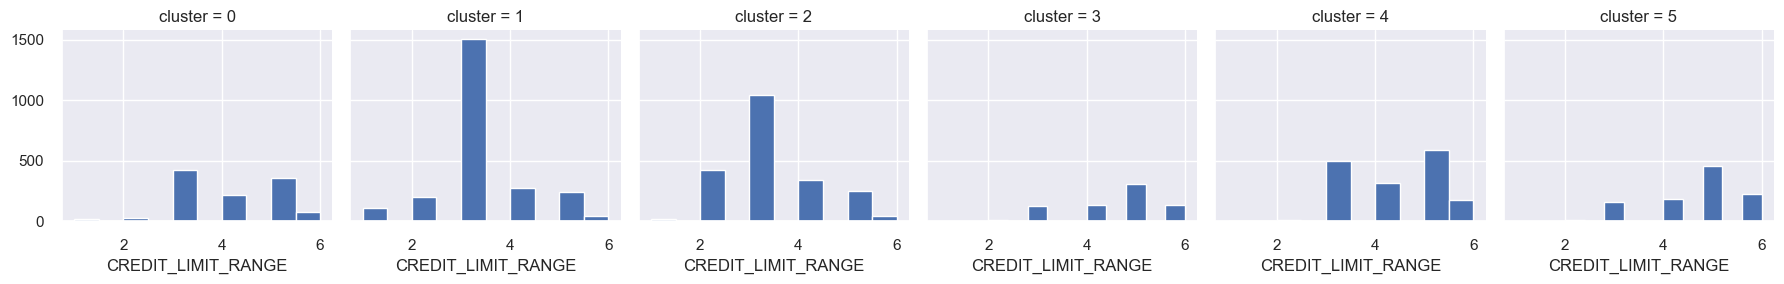

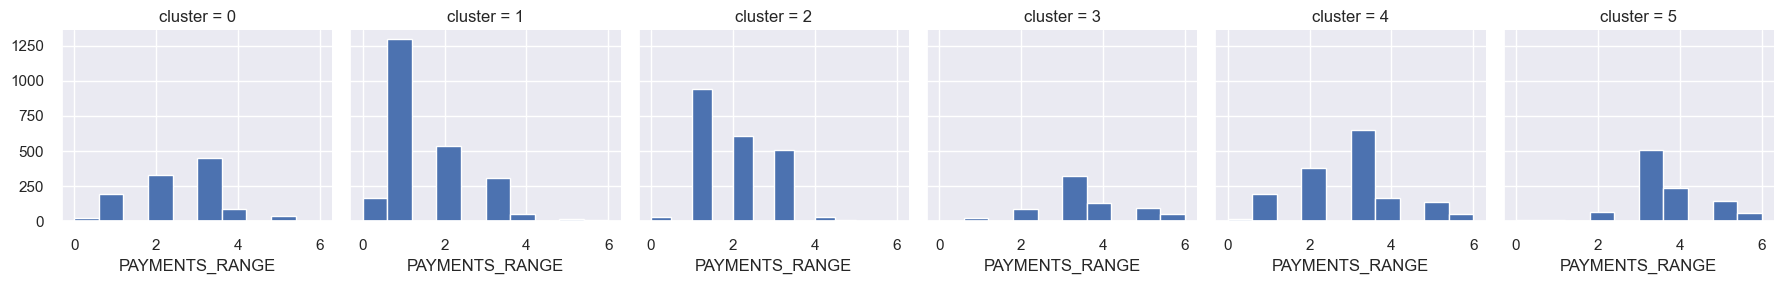

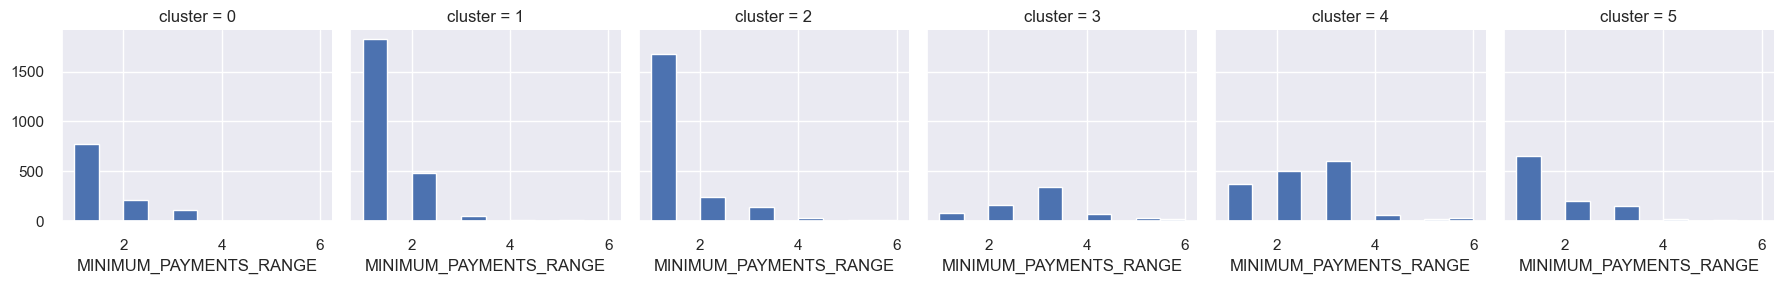

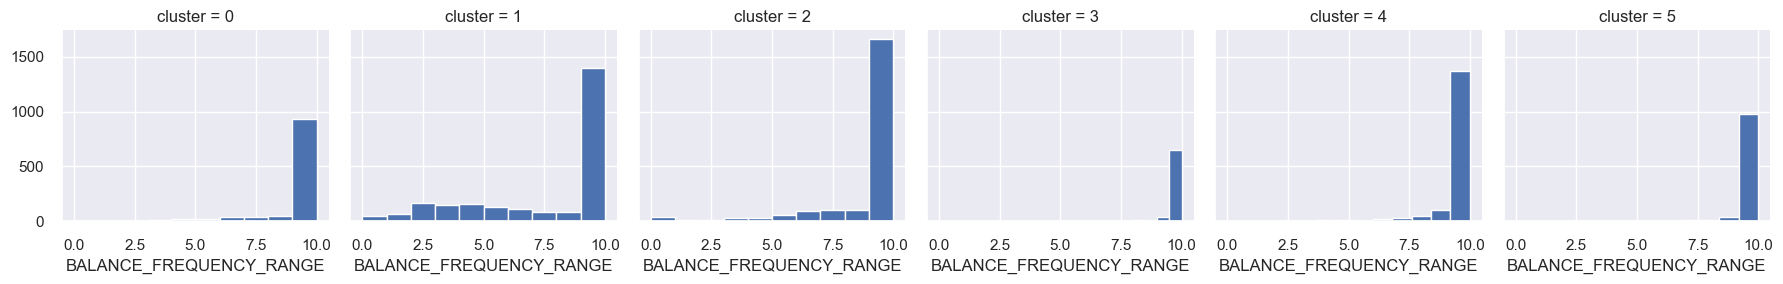

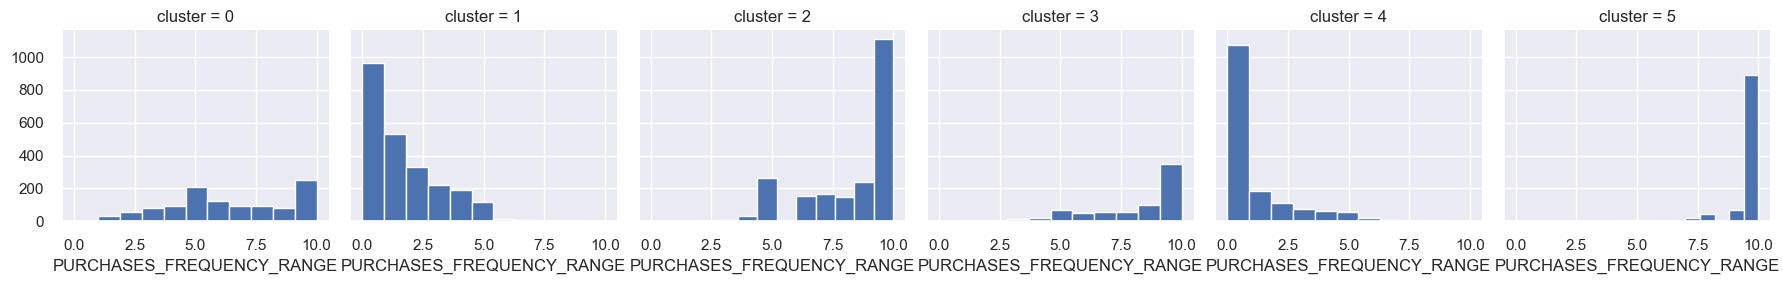

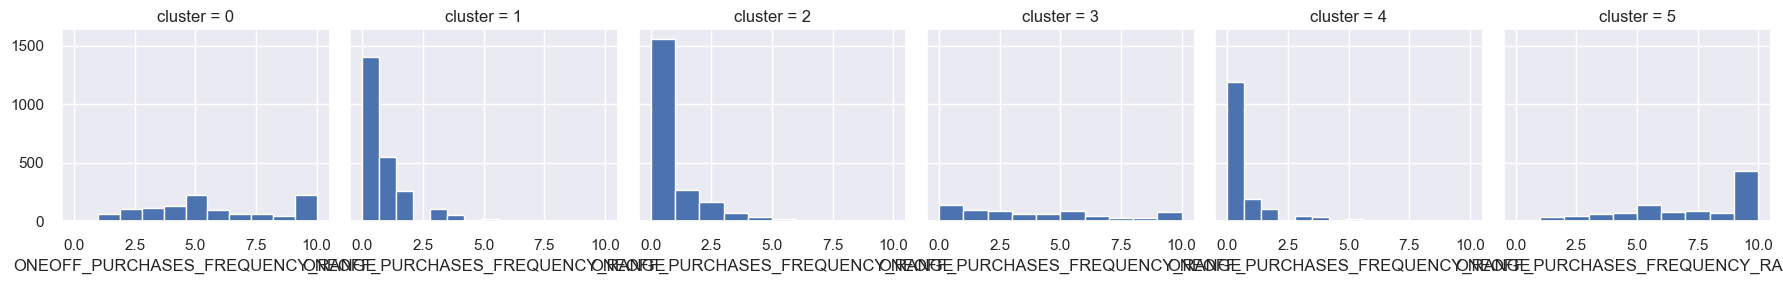

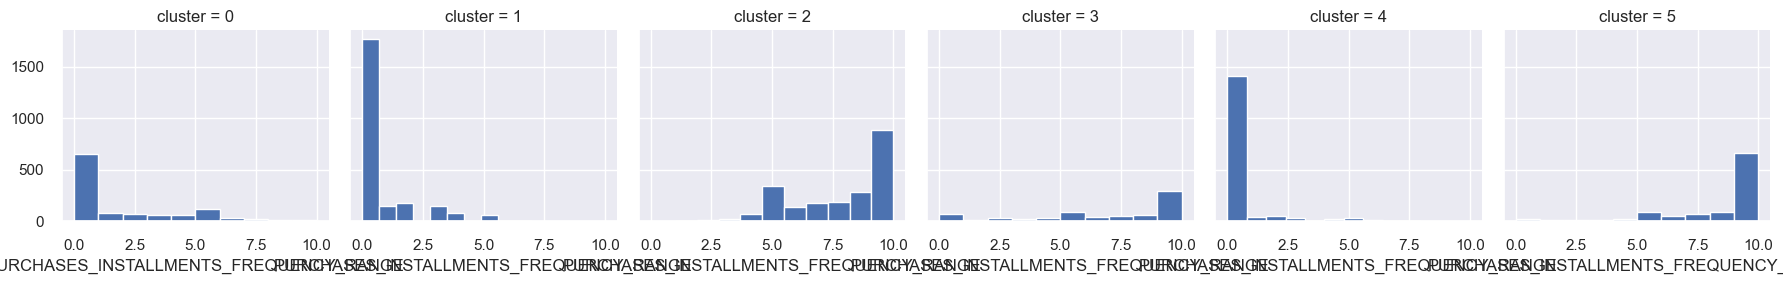

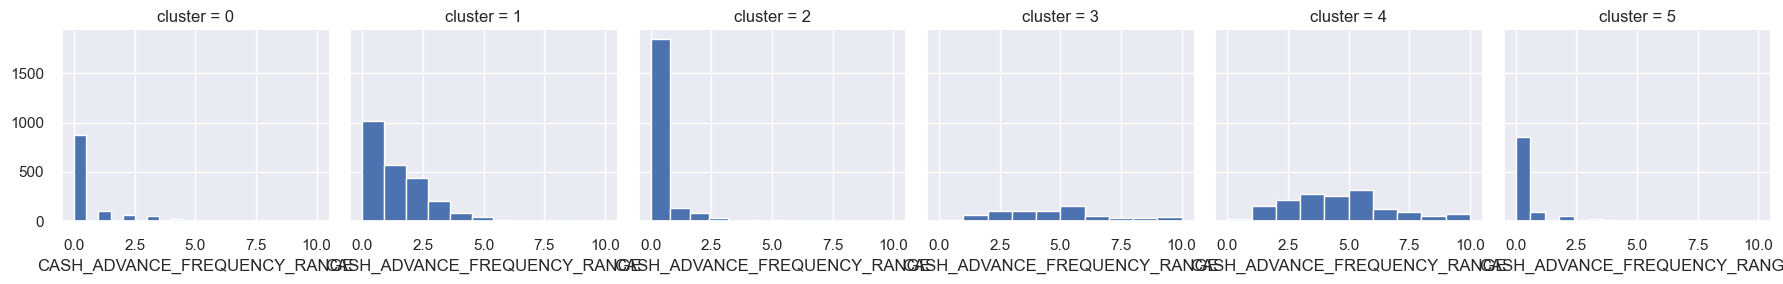

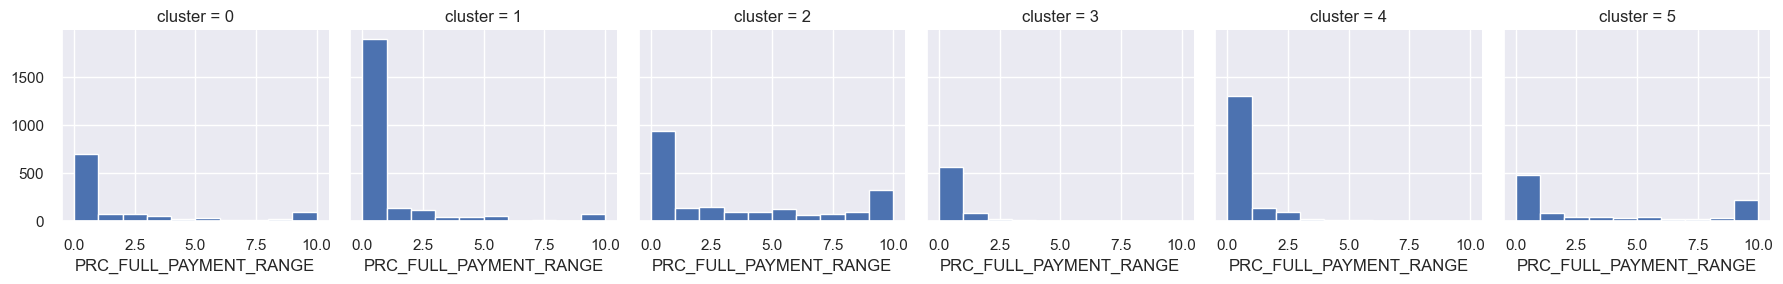

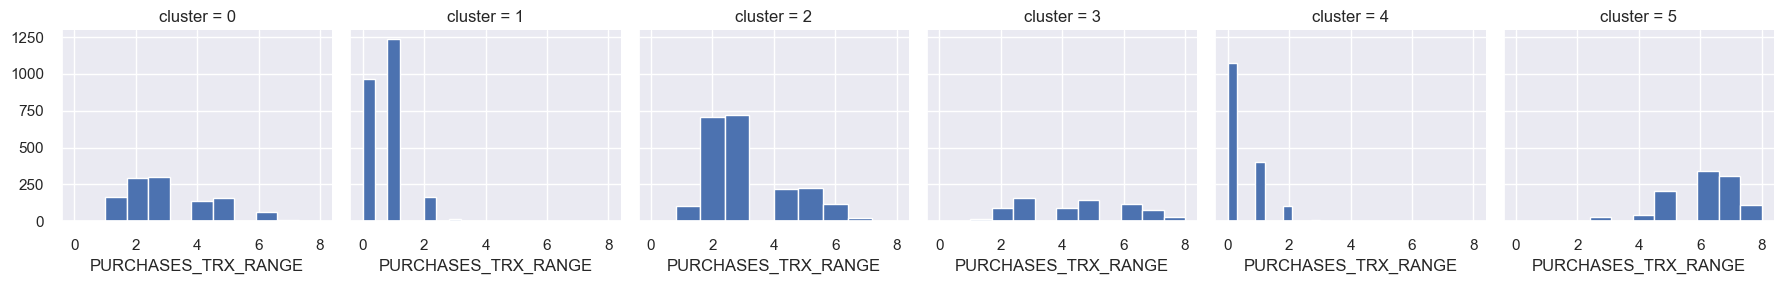

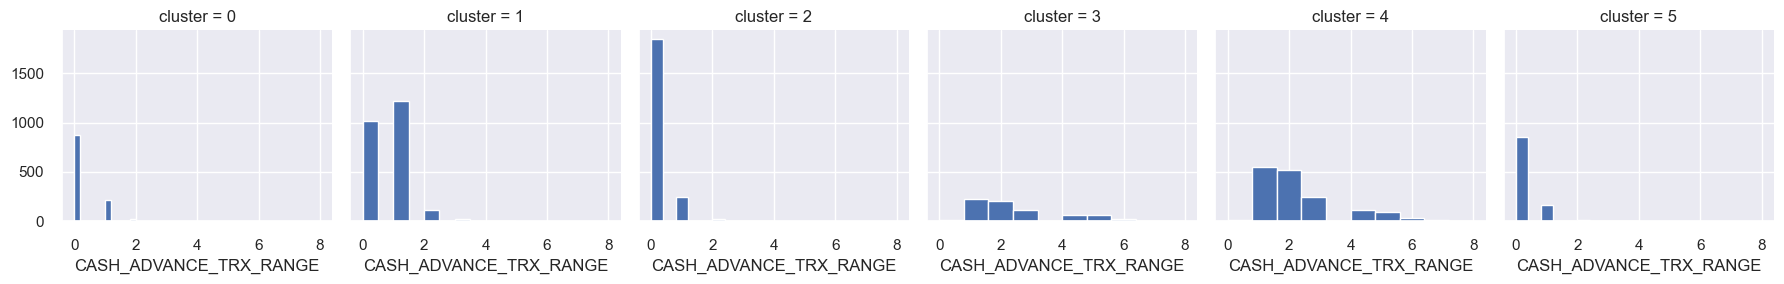

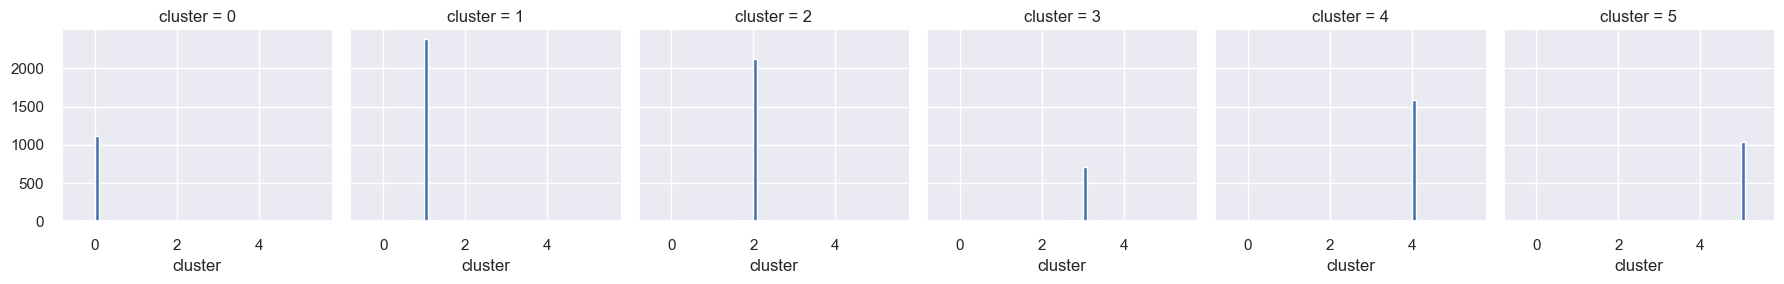

In [ ]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

* **Cluster0** Pessoas com limite de crédito Médio/Alto que fazem todos os tipos de compras

* **Cluster1** Este grupo tem mais pessoas Devendo Pagamentos, que recebem adiantamento em dinheiro com mais frequência

* **Cluster2** Menos gastadores com limites de crédito Médio/Alto e que compram principalmente em prestações

* **Cluster3** Pessoas com limite de crédito Alto, que aceitam mais dinheiro antecipadamente

* **Cluster4** Pessoas que gastam muito com Alto limite de crédito e fazem compras caras

* **Cluster5** Pessoas que não gastam muito dinheiro e que têm limite de crédito Médio/Alto

# Visualização dos Clusters, usando PCA

Usando PCA para transformar dados em 2 dimensões para visualização

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA


In [ ]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

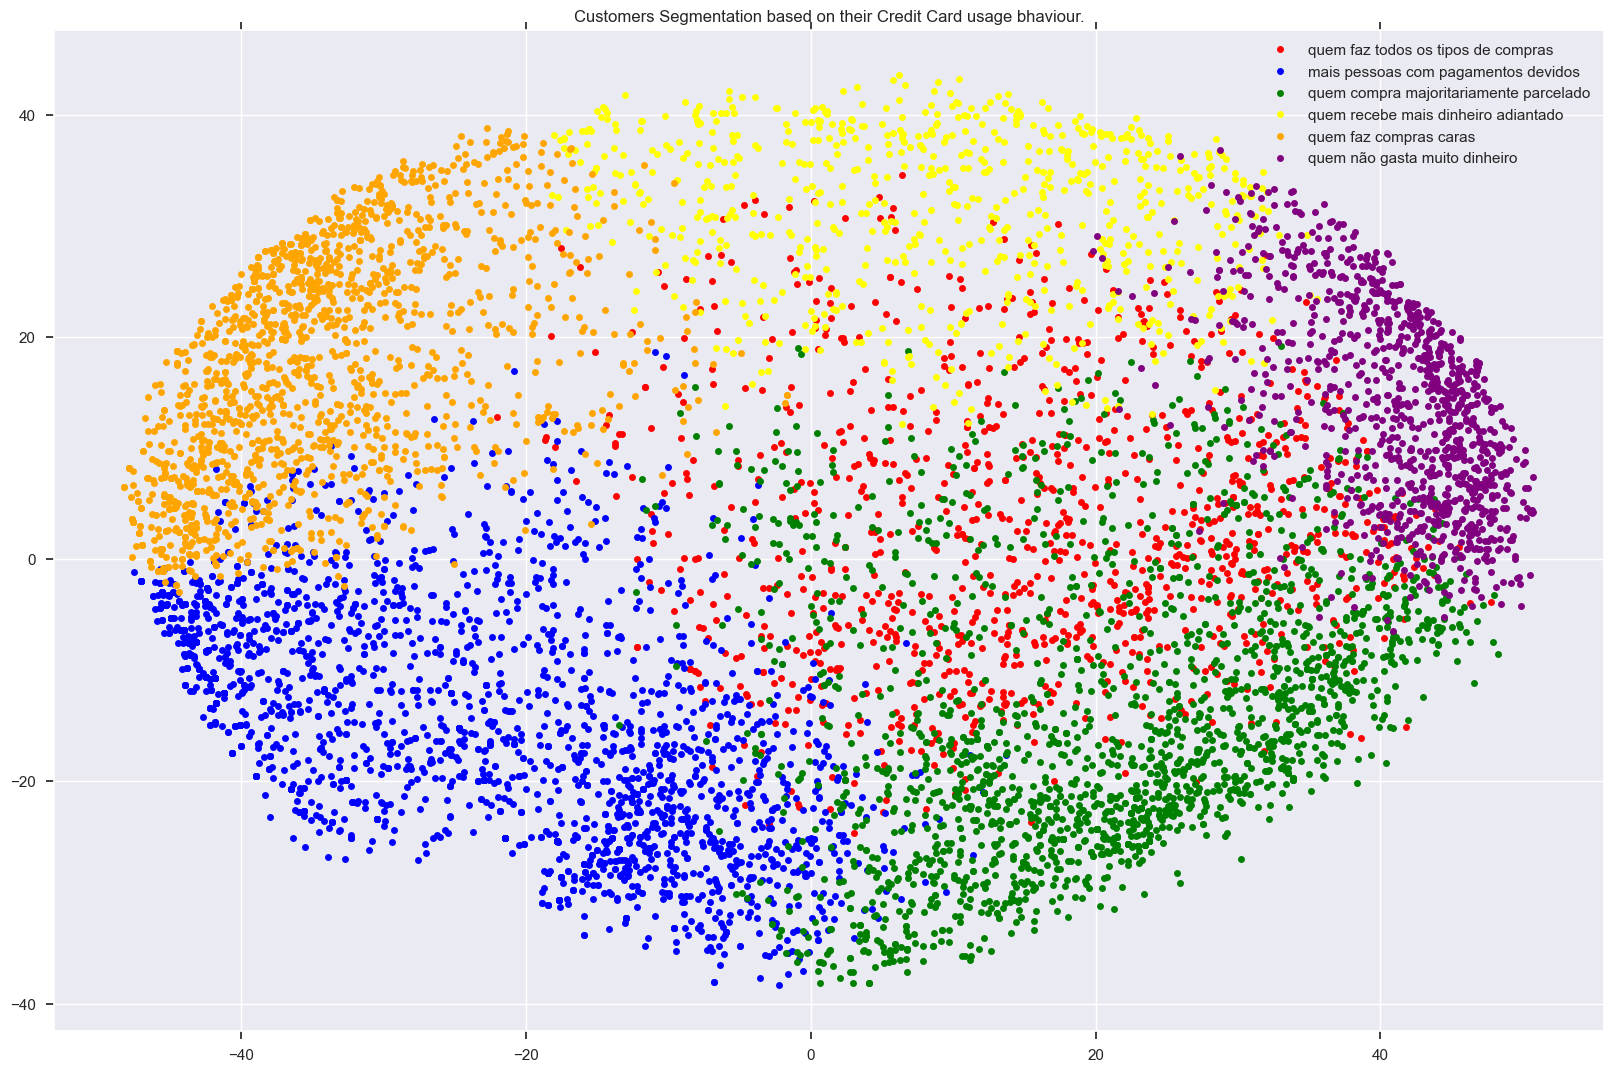

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {   0:    'quem faz todos os tipos de compras',
            1:    'mais pessoas com pagamentos devidos',
            2:    'quem compra majoritariamente parcelado',
            3:    'quem recebe mais dinheiro adiantado',
            4:    'quem faz compras caras',
            5:    'quem não gasta muito dinheiro'
            }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()